# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [9]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [10]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [11]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [12]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [13]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [14]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [18]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [20]:
client = MongoClient(mongod_connect)
db = client.gp3 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [21]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [22]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [23]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1330653900412694534
1330653900328857603
1330653900664418311
1330653900135948292
1330653900681007104
1330653900857282567
1330653901025112064
1330653900878311431
1330653901482168321
1330653901431902208
1330653901574516736
1330653902086303751
1330653902069506050
1330653902224695297
1330653902417620998
1330653902383894528
1330653902635667457
1330653902698590210
1330653902572822531
1330653903344451584
1330653903642365959
1330653903717797896
1330653903726252036
1330653903864651781
1330653904007270402
1330653904288112640
1330653904611151872
1330653905202638849
1330653905286541316
1330653905378742272
1330653905500450816
1330653905466896385
1330653905655566338
1330653905907310592
1330653906053918720
1330653906469175297
1330653906515451905
1330653906700005379
1330653906855202819
1330653906741981185
1330653906905522176
1330653907140263936
1330653907673108488
1330653907807158272
1330653908046213120
1330653908025405441
1330653908050579457
1330653908289675267
1330653908063186947
1330653908448931840


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [24]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [25]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [26]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 22 23:25:53 +0000 2020'
'Sun Nov 22 23:20:06 +0000 2020'
'Sun Nov 22 23:17:41 +0000 2020'
'Sun Nov 22 23:12:02 +0000 2020'
'Sun Nov 22 23:10:04 +0000 2020'
'Sun Nov 22 23:05:14 +0000 2020'
'Sun Nov 22 23:00:54 +0000 2020'
'Sun Nov 22 22:56:01 +0000 2020'
'Sun Nov 22 22:53:20 +0000 2020'
'Sun Nov 22 22:49:08 +0000 2020'
'Sun Nov 22 22:46:29 +0000 2020'
'Sun Nov 22 22:45:25 +0000 2020'
'Sun Nov 22 22:41:19 +0000 2020'
'Sun Nov 22 22:36:55 +0000 2020'
'Sun Nov 22 22:36:47 +0000 2020'
'Sun Nov 22 22:35:03 +0000 2020'
'Sun Nov 22 22:31:13 +0000 2020'
'Sun Nov 22 22:28:56 +0000 2020'
'Sun Nov 22 22:24:45 +0000 2020'
'Sun Nov 22 22:17:55 +0000 2020'
'Sun Nov 22 21:57:34 +0000 2020'
'Sun Nov 22 21:54:58 +0000 2020'
'Sun Nov 22 21:42:07 +0000 2020'
'Sun Nov 22 21:39:42 +0000 2020'
'Sun Nov 22 21:29:17 +0000 2020'
'Sun Nov 22 21:28:59 +0000 2020'
'Sun Nov 22 21:28:41 +0000 2020'
'Sun Nov 22 21:28:24 +0000 2020'
'Sun Nov 22 21:28:11 +0000 2020'
'Sun Nov 22 21:27:54 +0000 2020'
'Sun Nov 2

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [28]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 22 15:55:06 +0000 2020'
'Sun Nov 22 15:54:14 +0000 2020'
'Sun Nov 22 15:53:08 +0000 2020'
'Sun Nov 22 15:49:29 +0000 2020'
'Sun Nov 22 15:47:56 +0000 2020'
'Sun Nov 22 15:46:58 +0000 2020'
'Sun Nov 22 15:37:03 +0000 2020'
'Sun Nov 22 15:33:27 +0000 2020'
'Sun Nov 22 15:30:35 +0000 2020'
'Sun Nov 22 15:29:37 +0000 2020'
'Sun Nov 22 15:25:08 +0000 2020'
'Sun Nov 22 15:23:28 +0000 2020'
'Sun Nov 22 15:21:11 +0000 2020'
'Sun Nov 22 15:14:28 +0000 2020'
'Sun Nov 22 15:14:05 +0000 2020'
'Sun Nov 22 15:12:41 +0000 2020'
'Sun Nov 22 15:10:50 +0000 2020'
'Sun Nov 22 15:08:47 +0000 2020'
'Sun Nov 22 15:07:04 +0000 2020'
'Sun Nov 22 15:04:48 +0000 2020'
'Sun Nov 22 15:01:04 +0000 2020'
'Sun Nov 22 14:59:11 +0000 2020'
'Sun Nov 22 14:57:59 +0000 2020'
'Sun Nov 22 14:55:19 +0000 2020'
'Sun Nov 22 14:55:06 +0000 2020'
'Sun Nov 22 14:54:49 +0000 2020'
'Sun Nov 22 14:49:09 +0000 2020'
'Sun Nov 22 14:48:31 +0000 2020'
'Sun Nov 22 14:46:40 +0000 2020'
'Sun Nov 22 14:45:14 +0000 2020'
'Sun Nov 2

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [29]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

9410
8041


Create a text index and print the Tweets containing specific keywords. 

In [30]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [31]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [32]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Tyto Albus #KBF 🇬🇧 🦊
text: RT @LonsdaleKeith: @Conservatives @BorisJohnson We didn't vote to "build back" in any way, because we didn't vote to destroy what we had.…
----
name: Rock the Vote
text: "The relief of voting is that you know your vote is in there, you stood for something. And that's what counts, that… https://t.co/QrwVXss0L8
----
name: U2 KROQ 🇺🇸
text: RT @dame_keep: Texas voted for this. Guess you can't survive on racism alone, who knew that who you vote for matters. While you starve and…
----
name: Spurgeon Martin
text: We as individual voters must remember what the Republican party has done! Vote them out!
----
name: KerryAnne
text: @SteveBakerHW @TheSun Vote for the #COVID19 act did we Steve? If so best just be quiet!
----
name: SalseroYQue
text: #COVID19 1/4 million dead and #45 is playing golf💯🤬ck all of you who voted for that monster!
----
name: Melissa Gill
text: @TAHPAO2019 @Rumchug @Maxrodol50 @sunni1515 @RudyGiuliani @TeamTrump More votes in history sti

In [33]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [35]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,extended_tweet
0,5fb19808363d960d9e86a34b,Sun Nov 15 20:37:18 +0000 2020,1328074621447524355,1328074621447524355,RT @LonsdaleKeith: @Conservatives @BorisJohnso...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fb19769b4011eb39c374469,Sun Nov 15 21:00:06 +0000 2020,1328080359200854017,1328080359200854017,"""The relief of voting is that you know your vo...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.heyorca.com"" rel=""nofollo...",NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fb1980c363d960d9e86a4fe,Sun Nov 15 20:35:52 +0000 2020,1328074260196167680,1328074260196167680,RT @dame_keep: Texas voted for this. Guess you...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,1.328017e+18,1328017059431796737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fbaf3a9c30ddf6368c982fc,Sun Nov 22 23:26:28 +0000 2020,1330653908050579457,1330653908050579457,We as individual voters must remember what the...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,1.330547e+18,1330547116947632128,{'created_at': 'Sun Nov 22 16:22:07 +0000 2020...,"{'url': 'https://t.co/Cc1QeT0Pf9', 'expanded':...",0.0,0.0,low,1606087588690,NaN
4,5fb197ed363d960d9e86992a,Sun Nov 15 20:46:54 +0000 2020,1328077034589990912,1328077034589990912,@SteveBakerHW @TheSun Vote for the #COVID19 ac...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.327939e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fb19806363d960d9e86a2e1,Sun Nov 15 20:37:38 +0000 2020,1328074704016580608,1328074704016580608,#COVID19 1/4 million dead and #45 is playing g...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fbaf3c6c30ddf6368c98451,Sun Nov 22 03:00:42 +0000 2020,1330345432170569737,1330345432170569737,@TAHPAO2019 @Rumchug @Maxrodol50 @sunni1515 @R...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.330340e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fb197bf363d960d9e86843b,Sun Nov 15 21:03:45 +0000 2020,1328081277610840065,1328081277610840065,RT @RayBake: @SenJoniErnst @SenateGOP You repr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fb19770b4011eb39c3746f0,Sun Nov 15 20:58:07 +0000 2020,1328079857981460483,1328079857981460483,RT @RayBake: @SenJoniErnst @SenateGOP You repr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fbaf3c7c30ddf6368c98461,Sun Nov 22 01:58:09 +0000 2020,1330329690251403266,1330329690251403266,"""Prohibiting certification of the election res...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


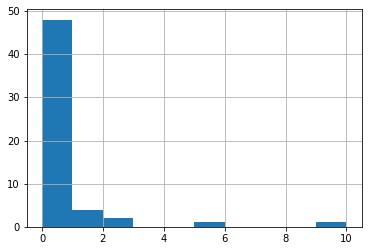

In [36]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count